# Deep Learning Project- Learn to apply deep learning paradigm to forecast univariate time series data.

## Deep learning is an upcoming field, where we are seeing a lot of implementations in the day to day business operations, including segmentation, clustering, forecasting, prediction or recommendation etc. Deep learning architecture has many branches and one of them is the recurrent neural network (RNN), the method that we are going to analyze in this deep learning project is about Long Short Term Memory Network (LSTM) to perform time series forecasting for univariate time series data.

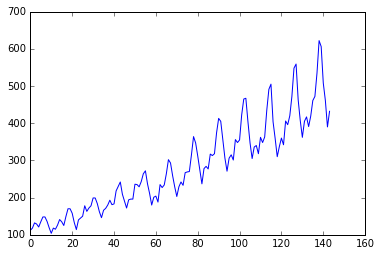

In [79]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pandas.read_csv('C:/Users/Dell/Downloads/international-airline-passengers.csv',usecols=[1],engine='python',skipfooter=3)
plt.plot(dataset)
plt.show()

In [80]:
import numpy
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [81]:
import sklearn

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
# for reproducability of the results let's fix the seed function
numpy.random.seed(1234)

In [85]:
dataset.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [86]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [87]:
# normaliza the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [88]:
dataset

array([[ 0.01544401],
       [ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853],
       [ 0.05984557],
       [ 0.08494207],
       [ 0.08494207],
       [ 0.06177607],
       [ 0.02895753],
       [ 0.        ],
       [ 0.02702703],
       [ 0.02123553],
       [ 0.04247104],
       [ 0.07142857],
       [ 0.05984557],
       [ 0.04054055],
       [ 0.08687258],
       [ 0.12741312],
       [ 0.12741312],
       [ 0.10424709],
       [ 0.05598456],
       [ 0.01930502],
       [ 0.06949806],
       [ 0.07915059],
       [ 0.08880308],
       [ 0.14285713],
       [ 0.11389962],
       [ 0.13127413],
       [ 0.14285713],
       [ 0.18339768],
       [ 0.18339768],
       [ 0.15444016],
       [ 0.11196911],
       [ 0.08108109],
       [ 0.1196911 ],
       [ 0.12934363],
       [ 0.14671814],
       [ 0.17181468],
       [ 0.14864865],
       [ 0.15250966],
       [ 0.22007722],
       [ 0.24324325],
       [ 0.26640925],
       [ 0.2027027 ],
       [ 0

In [89]:
# split the dataset into train and test 
train_size = int(len(dataset)*0.67)

In [90]:
print train_size

96


In [91]:
test_size = len(dataset) - train_size

In [92]:
print test_size

48


In [93]:
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [94]:
print (len(train), len(test))

(96, 48)


In [95]:
# create dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

In [96]:
#reshape the dataset X =current time, and Yt+1 =future time period
look_back =1
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [97]:
trainX = numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [98]:
print testX

[[[ 0.40733591]]

 [[ 0.3803089 ]]

 [[ 0.48648646]]

 [[ 0.47104248]]

 [[ 0.48455599]]

 [[ 0.61389959]]

 [[ 0.69691122]]

 [[ 0.70077217]]

 [[ 0.57915056]]

 [[ 0.46911195]]

 [[ 0.38803086]]

 [[ 0.44787642]]

 [[ 0.45559844]]

 [[ 0.41312739]]

 [[ 0.49806949]]

 [[ 0.47104248]]

 [[ 0.49999997]]

 [[ 0.63899612]]

 [[ 0.74710429]]

 [[ 0.7741313 ]]

 [[ 0.57915056]]

 [[ 0.49227801]]

 [[ 0.39768341]]

 [[ 0.44980696]]

 [[ 0.49420848]]

 [[ 0.45945945]]

 [[ 0.58301163]]

 [[ 0.56370652]]

 [[ 0.61003864]]

 [[ 0.71042466]]

 [[ 0.85714293]]

 [[ 0.87837839]]

 [[ 0.69305015]]

 [[ 0.5849421 ]]

 [[ 0.49806949]]

 [[ 0.58108103]]

 [[ 0.60424709]]

 [[ 0.55405402]]

 [[ 0.60810804]]

 [[ 0.6891892 ]]

 [[ 0.71042466]]

 [[ 0.83204639]]

 [[ 1.        ]]

 [[ 0.96911204]]

 [[ 0.77992272]]

 [[ 0.6891892 ]]]


In [99]:
# let's create  a RNN or LSTM model
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# fit the model
model.fit(trainX,trainY,batch_size=1,verbose=2)

Epoch 1/10
3s - loss: 0.0463
Epoch 2/10
3s - loss: 0.0252
Epoch 3/10
3s - loss: 0.0180
Epoch 4/10
3s - loss: 0.0161
Epoch 5/10
3s - loss: 0.0152
Epoch 6/10
3s - loss: 0.0144
Epoch 7/10
4s - loss: 0.0135
Epoch 8/10
3s - loss: 0.0122
Epoch 9/10
4s - loss: 0.0108
Epoch 10/10
3s - loss: 0.0093


In [100]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [101]:
print trainPredict

[[ 0.15360416]
 [ 0.15739179]
 [ 0.16633824]
 [ 0.16440865]
 [ 0.15929623]
 [ 0.16827445]
 [ 0.1767391 ]
 [ 0.1767391 ]
 [ 0.16892132]
 [ 0.15802582]
 [ 0.14859922]
 [ 0.15739179]
 [ 0.15549439]
 [ 0.16248578]
 [ 0.17216642]
 [ 0.16827445]
 [ 0.16184634]
 [ 0.17739511]
 [ 0.19132157]
 [ 0.19132157]
 [ 0.18332903]
 [ 0.1669829 ]
 [ 0.15486351]
 [ 0.17151597]
 [ 0.17477524]
 [ 0.17805177]
 [ 0.19669823]
 [ 0.18664837]
 [ 0.19266221]
 [ 0.19669823]
 [ 0.21098007]
 [ 0.21098007]
 [ 0.20075473]
 [ 0.18598323]
 [ 0.17542918]
 [ 0.18864748]
 [ 0.1919916 ]
 [ 0.19804817]
 [ 0.20687602]
 [ 0.19872397]
 [ 0.20007727]
 [ 0.22408813]
 [ 0.23244569]
 [ 0.24085623]
 [ 0.21785879]
 [ 0.20551208]
 [ 0.19266221]
 [ 0.20755878]
 [ 0.20892578]
 [ 0.20892578]
 [ 0.23664476]
 [ 0.23594403]
 [ 0.23174712]
 [ 0.24155931]
 [ 0.25639129]
 [ 0.26207116]
 [ 0.23734584]
 [ 0.21924004]
 [ 0.19804817]
 [ 0.21235204]
 [ 0.21441357]
 [ 0.20347001]
 [ 0.23594403]
 [ 0.23035108]
 [ 0.23524365]
 [ 0.25639129]
 [ 0.28347

In [102]:
print testPredict

[[ 0.2927832 ]
 [ 0.28275907]
 [ 0.32217008]
 [ 0.31643915]
 [ 0.32145393]
 [ 0.36913764]
 [ 0.39920825]
 [ 0.40059304]
 [ 0.35640526]
 [ 0.31572253]
 [ 0.2856214 ]
 [ 0.30783731]
 [ 0.31070507]
 [ 0.29493296]
 [ 0.32646525]
 [ 0.31643915]
 [ 0.3271808 ]
 [ 0.37828445]
 [ 0.41710269]
 [ 0.42663521]
 [ 0.35640526]
 [ 0.32431805]
 [ 0.28920138]
 [ 0.30855429]
 [ 0.32503384]
 [ 0.3121388 ]
 [ 0.35782349]
 [ 0.35072434]
 [ 0.36772668]
 [ 0.40404922]
 [ 0.45541704]
 [ 0.46265185]
 [ 0.39782208]
 [ 0.35853231]
 [ 0.32646525]
 [ 0.35711443]
 [ 0.36560833]
 [ 0.3471677 ]
 [ 0.36702076]
 [ 0.39643461]
 [ 0.40404922]
 [ 0.44679797]
 [ 0.50300825]
 [ 0.49293768]
 [ 0.4286679 ]
 [ 0.39643461]]


In [103]:
# reverse the predicted values to thee actual time series values using inverse tranform function
trainPredict = scaler.inverse_transform(trainPredict) 
testPredict = scaler.inverse_transform(testPredict)

trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

In [104]:
print trainPredict, trainY

[[ 183.56697083]
 [ 185.52894592]
 [ 190.16320801]
 [ 189.16368103]
 [ 186.51545715]
 [ 191.16615295]
 [ 195.55085754]
 [ 195.55085754]
 [ 191.50125122]
 [ 185.8573761 ]
 [ 180.97441101]
 [ 185.52894592]
 [ 184.5460968 ]
 [ 188.16763306]
 [ 193.18222046]
 [ 191.16615295]
 [ 187.83641052]
 [ 195.89067078]
 [ 203.10458374]
 [ 203.10458374]
 [ 198.96443176]
 [ 190.49714661]
 [ 184.21929932]
 [ 192.84527588]
 [ 194.53358459]
 [ 196.2308197 ]
 [ 205.88967896]
 [ 200.68385315]
 [ 203.79902649]
 [ 205.88967896]
 [ 213.28768921]
 [ 213.28768921]
 [ 207.99095154]
 [ 200.33930969]
 [ 194.87232971]
 [ 201.71939087]
 [ 203.4516449 ]
 [ 206.58895874]
 [ 211.16177368]
 [ 206.93902588]
 [ 207.64002991]
 [ 220.07765198]
 [ 224.40686035]
 [ 228.76353455]
 [ 216.8508606 ]
 [ 210.45526123]
 [ 203.79902649]
 [ 211.51545715]
 [ 212.22355652]
 [ 212.22355652]
 [ 226.58200073]
 [ 226.2190094 ]
 [ 224.04501343]
 [ 229.12771606]
 [ 236.8106842 ]
 [ 239.75286865]
 [ 226.94514465]
 [ 217.56634521]
 [ 206.5889587

In [105]:
print testPredict, testY

[[ 255.66169739]
 [ 250.46920776]
 [ 270.88412476]
 [ 267.91546631]
 [ 270.51312256]
 [ 295.21328735]
 [ 310.78988647]
 [ 311.50717163]
 [ 288.61791992]
 [ 267.54428101]
 [ 251.95188904]
 [ 263.45974731]
 [ 264.94522095]
 [ 256.77526855]
 [ 273.10897827]
 [ 267.91546631]
 [ 273.47967529]
 [ 299.95132446]
 [ 320.05917358]
 [ 324.99707031]
 [ 288.61791992]
 [ 271.99673462]
 [ 253.80632019]
 [ 263.83111572]
 [ 272.36755371]
 [ 265.68789673]
 [ 289.35256958]
 [ 285.67520142]
 [ 294.48242188]
 [ 313.29751587]
 [ 339.90600586]
 [ 343.65365601]
 [ 310.0718689 ]
 [ 289.71972656]
 [ 273.10897827]
 [ 288.98526001]
 [ 293.38510132]
 [ 283.83288574]
 [ 294.11676025]
 [ 309.35314941]
 [ 313.29751587]
 [ 335.44134521]
 [ 364.55825806]
 [ 359.34170532]
 [ 326.04995728]
 [ 309.35314941]] [[ 301.00001152  355.999993    348.00001085  355.00000681  421.9999924
   465.0000161   466.99998848  403.99999397  346.99999379  304.99998716
   335.99999132  339.99999783  317.99999288  362.00000277  348.00001085
  

In [106]:
# calculate the RMSE root mean square error
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print ('Train Score: %.2f RMSE' % (trainScore))

Train Score: 47.59 RMSE


In [107]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print ('Test Score: %.2f RMSE' % (testScore))

Test Score: 136.17 RMSE


In [ ]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('C:/Users/Dell/Downloads/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()